
# Exercise 5 (Spark in Scala)   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;     [4 points]
---

#### For this exercise, you will work on this JupyterLab notebook, and solve the tasks listed herein. These tasks, in addition to writing Spark code, require you to analyse various query plans and to reason about them.


#### To familiarise yourself with Spark and the Scala language, we also provide you with two JupyterLab notebooks, namely Notebook 1 and Notebook 2, which you can upload on JupyterLab and run yourself. To get a deeper understanding, and look up the types and definitions of various functions, we recommend that you visit the Spark and Spark SQL documentation.

- ### **a) Elementary RDD functions**
You are given an number of RDD objects, and need to produce a set of specified RDDs from them. Use the RDD API for this, specifically functions such as map, flatmap, reduce, etc.  


You are given a list of 40 randomly produced integers, called randomList.

In [ ]:
import util.Random.nextInt
val randomList = sc.parallelize(List.fill(40)(util.Random.nextInt))   

Intitializing Scala interpreter ...

Compute the square root of each element in the list 'randomList', and then produce the sum of all square roots which are larger than 3:

In [9]:
randomList.collect().foreach(x => print(x + " "))

2141980347 1789541312 1527091290 -199427671 1112816953 426738582 340281023 2118956868 -351798518 -1610754376 -786514310 729781671 1755326314 1791408652 1737463900 329757323 -365934040 -1567676023 2028676842 288455217 1588524990 -760245067 -107443563 -224435834 1320184482 1958256488 1478221102 1243913857 -148840997 -1751340331 -1030807400 -829914416 -1800307498 -872781110 1462691006 -116237134 -1752957831 -970650826 -2127111993 -1378352602 

In [21]:
import scala.math.sqrt  // enables you to use the function sqrt() for computing the square root of a number
val allSquareRoots = randomList.map(x => sqrt(x)).filter(x => x>=3)
allSquareRoots.collect().sum

import scala.math.sqrt
allSquareRoots: org.apache.spark.rdd.RDD[Double] = MapPartitionsRDD[13] at filter at <console>:38
res18: Double = 711665.7505125698


Produce the minimal value of 'randomList'. **Hint:** Can you solve this by just using reduce? Try to define/find a suitable helper function.

In [26]:
val minimal = randomList.reduce(((x,y)=> if (x < y) x else y))

minimal: Int = -2127111993


Produce for the 'randomList' the average absolute difference to the minimal value. 

In [29]:
val averageDifference = randomList.map(x => (x - minimal).abs)
averageDifference.collect().foreach(x => print(x + " "))

25874956 378313991 640764013 1927684322 1055038350 1741116721 1827574280 48898435 1775313475 516357617 1340597683 1438073632 412528989 376446651 430391403 1838097980 1761177953 559435970 139178461 1879400086 579330313 1366866926 2019668430 1902676159 847670821 209598815 689634201 923941446 1978270996 375771662 1096304593 1297197577 326804495 1254330883 705164297 2010874859 374154162 1156461167 0 748759391 

averageDifference: org.apache.spark.rdd.RDD[Int] = MapPartitionsRDD[15] at map at <console>:40


You are given a random list of words

In [30]:
val words = sc.parallelize(List("key", "data", "car", "fish"))

words: org.apache.spark.rdd.RDD[String] = ParallelCollectionRDD[16] at parallelize at <console>:35


Consider the following two predefined functions on String.

In [31]:
def getTails (word:String) =  word.tails.toList.filter(x => x.length > 0)
getTails("Example")

getTails: (word: String)List[String]
res20: List[String] = List(Example, xample, ample, mple, ple, le, e)


In [32]:
def getInitials (word:String) = word.inits.toList.filter(x => x.length > 0)
getInitials("Example")

getInitials: (word: String)List[String]
res21: List[String] = List(Example, Exampl, Examp, Exam, Exa, Ex, E)


Using the functions above, produce a single list containing all substrings of elements from the list 'words'. A formal definition of 'substring', is given here: https://en.wikipedia.org/wiki/Substring#Substring.

In [34]:
def allSubstrings = words.map(x => (getTails(x)++getInitials(x)).distinct)
allSubstrings.collect()

allSubstrings: org.apache.spark.rdd.RDD[List[String]]
res23: Array[List[String]] = Array(List(key, ey, y, ke, k), List(data, ata, ta, a, dat, da, d), List(car, ar, r, ca, c), List(fish, ish, sh, h, fis, fi, f))


- ### **b) From SQL to Dataframe (and back again)**

Find for each of the Spark SQL queries an equivalent one that only uses the Dataframe API (or vice versa)


In [35]:
val medallionDF = spark.read.options(Map("header"->"true")).format("csv").load("/home/adbs21/shared/medallion-vehicles.csv")
val parkingDF = spark.read.options(Map("header"->"true")).format("csv").load("/home/adbs21/shared/parking-violations.csv")


// Creating the views for SparkSQL
medallionDF.createOrReplaceTempView("medallion")
parkingDF.createOrReplaceTempView("parking")

medallionDF: org.apache.spark.sql.DataFrame = [License Number: string, Name: string ... 14 more fields]
parkingDF: org.apache.spark.sql.DataFrame = [Plate: string, State: string ... 17 more fields]


In [36]:
medallionDF.printSchema()
parkingDF.printSchema()

root
 |-- License Number: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Expiration Date: string (nullable = true)
 |-- Current Status: string (nullable = true)
 |-- DMV License Plate Number: string (nullable = true)
 |-- Vehicle VIN Number: string (nullable = true)
 |-- Vehicle Type: string (nullable = true)
 |-- Model Year: string (nullable = true)
 |-- Medallion Type: string (nullable = true)
 |-- Agent Number: string (nullable = true)
 |-- Agent Name: string (nullable = true)
 |-- Agent Telephone Number: string (nullable = true)
 |-- Agent Website Address: string (nullable = true)
 |-- Agent Address: string (nullable = true)
 |-- Last Date Updated: string (nullable = true)
 |-- Last Time Updated: string (nullable = true)

root
 |-- Plate: string (nullable = true)
 |-- State: string (nullable = true)
 |-- License Type: string (nullable = true)
 |-- Summons Number: string (nullable = true)
 |-- Issue Date: string (nullable = true)
 |-- Violation Time: string (nulla

**Hint:** when _referring to column names with spaces in them_, use backticks, as shown query1.

Query 1: Transform the given Spark SQL query into the Dataframe API

In [37]:
val query1 = spark.sql("SELECT COUNT(*) FROM medallion WHERE  `Medallion Type` = 'NAMED DRIVER'  ")
query1.show() // 'false' turns of truncation of row entries
query1.explain()

+--------+
|count(1)|
+--------+
|10115872|
+--------+

== Physical Plan ==
*(2) HashAggregate(keys=[], functions=[count(1)])
+- Exchange SinglePartition
   +- *(1) HashAggregate(keys=[], functions=[partial_count(1)])
      +- *(1) Project
         +- *(1) Filter (isnotnull(Medallion Type#18) && (Medallion Type#18 = NAMED DRIVER))
            +- *(1) FileScan csv [Medallion Type#18] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservice1/home/adbs21/shared/medallion-vehicles.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Medallion Type), EqualTo(Medallion Type,NAMED DRIVER)], ReadSchema: struct<Medallion Type:string>


query1: org.apache.spark.sql.DataFrame = [count(1): bigint]


In [41]:
val query1DF = medallionDF.filter(medallionDF("Medallion Type")==="NAMED DRIVER").agg(count(medallionDF("Medallion Type")))
query1DF.show()
query1DF.explain()

+---------------------+
|count(Medallion Type)|
+---------------------+
|             10115872|
+---------------------+

== Physical Plan ==
*(2) HashAggregate(keys=[], functions=[count(Medallion Type#18)])
+- Exchange SinglePartition
   +- *(1) HashAggregate(keys=[], functions=[partial_count(Medallion Type#18)])
      +- *(1) Project [Medallion Type#18]
         +- *(1) Filter (isnotnull(Medallion Type#18) && (Medallion Type#18 = NAMED DRIVER))
            +- *(1) FileScan csv [Medallion Type#18] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservice1/home/adbs21/shared/medallion-vehicles.csv], PartitionFilters: [], PushedFilters: [IsNotNull(Medallion Type), EqualTo(Medallion Type,NAMED DRIVER)], ReadSchema: struct<Medallion Type:string>


query1DF: org.apache.spark.sql.DataFrame = [count(Medallion Type): bigint]


Query 2: Transform the given Dataframe API query into Spark SQL

In [45]:
val query2 = parkingDF.groupBy("`License Type`").count()
query2.show(false) // 'false' turns of truncation of row entries
query2.explain()

+------------+-------+
|License Type|count  |
+------------+-------+
|CCK         |51     |
|OMO         |47     |
|LMB         |1651   |
|CLG         |20     |
|SOS         |244    |
|SPC         |616    |
|SUP         |68     |
|NYA         |170    |
|APP         |125435 |
|FAR         |42     |
|RGL         |12791  |
|CHC         |914    |
|STA         |1399   |
|BOT         |35     |
|RGC         |513    |
|TRC         |56388  |
|AMB         |514    |
|COM         |3982381|
|BOB         |232    |
|HAM         |408    |
+------------+-------+
only showing top 20 rows

== Physical Plan ==
*(2) HashAggregate(keys=[License Type#54], functions=[count(1)])
+- Exchange hashpartitioning(License Type#54, 200)
   +- *(1) HashAggregate(keys=[License Type#54], functions=[partial_count(1)])
      +- *(1) FileScan csv [License Type#54] Batched: false, Format: CSV, Location: InMemoryFileIndex[hdfs://nameservice1/home/adbs21/shared/parking-violations.csv], PartitionFilters: [], PushedFilters: [], 

query2: org.apache.spark.sql.DataFrame = [License Type: string, count: bigint]


In [44]:
val query2SQL = spark.sql("SELECT `License Type`, COUNT(`License Type`) FROM parking GROUP BY `License Type` ")
query2SQL.show(false)
query2SQL.explain

+------------+-------------------+
|License Type|count(License Type)|
+------------+-------------------+
|CCK         |51                 |
|OMO         |47                 |
|LMB         |1651               |
|CLG         |20                 |
|SOS         |244                |
|SPC         |616                |
|SUP         |68                 |
|NYA         |170                |
|APP         |125435             |
|FAR         |42                 |
|RGL         |12791              |
|STA         |1399               |
|CHC         |914                |
|BOT         |35                 |
|RGC         |513                |
|TRC         |56388              |
|AMB         |514                |
|COM         |3982381            |
|BOB         |232                |
|HAM         |408                |
+------------+-------------------+
only showing top 20 rows

== Physical Plan ==
*(2) HashAggregate(keys=[License Type#54], functions=[count(License Type#54)])
+- Exchange hashpartitioning(Licens

query2SQL: org.apache.spark.sql.DataFrame = [License Type: string, count(License Type): bigint]


Query 3: Transform the given Dataframe API query into Spark SQL

In [46]:
val query3 = spark.sql("SELECT name, COUNT(`DMV License Plate Number`) as count_license_plate FROM medallion GROUP BY name")
query3.show(false) // 'false' turns of truncation of row entries
query3.explain()

+--------------------------+-------------------+
|name                      |count_license_plate|
+--------------------------+-------------------+
|FLORIAN & ROBERT INC      |1892               |
|YANIV EXPRESS CAB CORP    |2143               |
|BENE CAB CORP             |3195               |
|NINO CAB CORP.            |2128               |
|OLYMPOS TRANS INC         |3214               |
|Y. BILLY TAXI INC.        |2135               |
|GART CAB CORP             |2141               |
|NIXON TAXI CORP           |3210               |
|ALLIS CAB CORP            |2153               |
|SPECTER CAB CORP          |2144               |
|GEORGAKOPOULOS, GEORGIA   |995                |
|HUEZO, SALVADOR           |1057               |
|SALA, VITO                |1055               |
|LEIBOWITZ, LOUIS          |1057               |
|RADOSZYCKI, MICHAEL       |1057               |
|MANOLANGAS, STEVE         |1058               |
|SADACCA,GILLA             |1055               |
|QURESHI, BASHIR A. 

query3: org.apache.spark.sql.DataFrame = [name: string, count_license_plate: bigint]


In [53]:
val query3DF= medallionDF.groupBy("name").count().withColumnRenamed("count","count_license_plate")
query3DF.show(false) // 'false' turns of truncation of row entries
query3DF.explain()

+------------------------+-------------------+
|name                    |count_license_plate|
+------------------------+-------------------+
|CALCIUM ONE SERVICE INC.|1974               |
|FLORIAN & ROBERT INC    |1892               |
|CHARLES,WILBERT         |1061               |
|OLYMPOS TRANS INC       |3214               |
|GART CAB CORP           |2141               |
|SFEIR CAB CORP          |2096               |
|SPECTER CAB CORP        |2144               |
|GAUTHIER,JACQUES        |1067               |
|NINO CAB CORP.          |2128               |
|COFI BOAT CORP.         |831                |
|JEAN-PIERRE,SERGE       |1074               |
|LEIBOWITZ, LOUIS        |1057               |
|GEORGAKOPOULOS, GEORGIA |995                |
|RADOSZYCKI, MICHAEL     |1057               |
|NIXON TAXI CORP         |3210               |
|SALA, VITO              |1055               |
|RAXIT, RANJAN, KUMAR    |1069               |
|BOULOS TAXI CORP.       |2148               |
|SCHACHER,GAR

query3DF: org.apache.spark.sql.DataFrame = [name: string, count_license_plate: bigint]


Query 4: Transform the given Dataframe API query into Spark SQL

In [49]:
val query4 = medallionDF
      .join(parkingDF, parkingDF("`Plate`") === medallionDF("`DMV License Plate Number`"))
      .groupBy(medallionDF("`name`"))
      .agg(count(parkingDF("`Plate`")).as("count_violations"))
      .orderBy(desc("count_violations"))
query4.show(false) // 'false' turns of truncation of row entries
query4.explain()

+----------------------+----------------+
|name                  |count_violations|
+----------------------+----------------+
|NY GOURMET TAXI CORP  |352941          |
|SINGH, LAKHWINDER     |217056          |
|HAMMAD HACKING CORP   |149054          |
|FRIDUTZA TRANSIT INC  |147108          |
|CHESTER CAB CORP      |143578          |
|CLYDE CAB CORP        |143536          |
|TOPS CAB CORP         |141713          |
|TURBO TRANS CORP      |135792          |
|SHERPA,KAJI           |122600          |
|SEKHARAN, THAMPI,N    |112254          |
|OPO TRANSIT INC.      |111146          |
|SEAN CAB CORP         |109869          |
|ESTIA TRANSPORT INC   |102546          |
|KLARA & SIMON CAB CORP|98770           |
|LEROY CAB CORP        |96131           |
|NOYA CAB CORP         |95234           |
|PATTY TAXI CORP       |93227           |
|RIO CAB CORP          |92358           |
|DOUKOURE, MOHAMED     |88810           |
|LAU,TING,KWOK         |88536           |
+----------------------+----------

query4: org.apache.spark.sql.Dataset[org.apache.spark.sql.Row] = [name: string, count_violations: bigint]


In [55]:
val query4SQL = spark.sql("SELECT m.name, count(p.Plate) as count_violations FROM medallion m JOIN parking p on m.`DMV License Plate Number` = p.`Plate` GROUP BY m.name ORDER BY count_violations DESC")
query4SQL.show(false) // 'false' turns of truncation of row entries
query4SQL.explain()

+----------------------+----------------+
|name                  |count_violations|
+----------------------+----------------+
|NY GOURMET TAXI CORP  |352941          |
|SINGH, LAKHWINDER     |217056          |
|HAMMAD HACKING CORP   |149054          |
|FRIDUTZA TRANSIT INC  |147108          |
|CHESTER CAB CORP      |143578          |
|CLYDE CAB CORP        |143536          |
|TOPS CAB CORP         |141713          |
|TURBO TRANS CORP      |135792          |
|SHERPA,KAJI           |122600          |
|SEKHARAN, THAMPI,N    |112254          |
|OPO TRANSIT INC.      |111146          |
|SEAN CAB CORP         |109869          |
|ESTIA TRANSPORT INC   |102546          |
|KLARA & SIMON CAB CORP|98770           |
|LEROY CAB CORP        |96131           |
|NOYA CAB CORP         |95234           |
|PATTY TAXI CORP       |93227           |
|RIO CAB CORP          |92358           |
|DOUKOURE, MOHAMED     |88810           |
|LAU,TING,KWOK         |88536           |
+----------------------+----------

query4SQL: org.apache.spark.sql.DataFrame = [name: string, count_violations: bigint]


---

- ### **c) Wide and Narrow Dependencies**

You are given a DAG visualisation of how Spark executed a query in various stages, with arrows indicating various parts of the query plan. 


Here is the query plan of query3.

Here is the final query plan which Spark produces (exported from the internal Web UI).


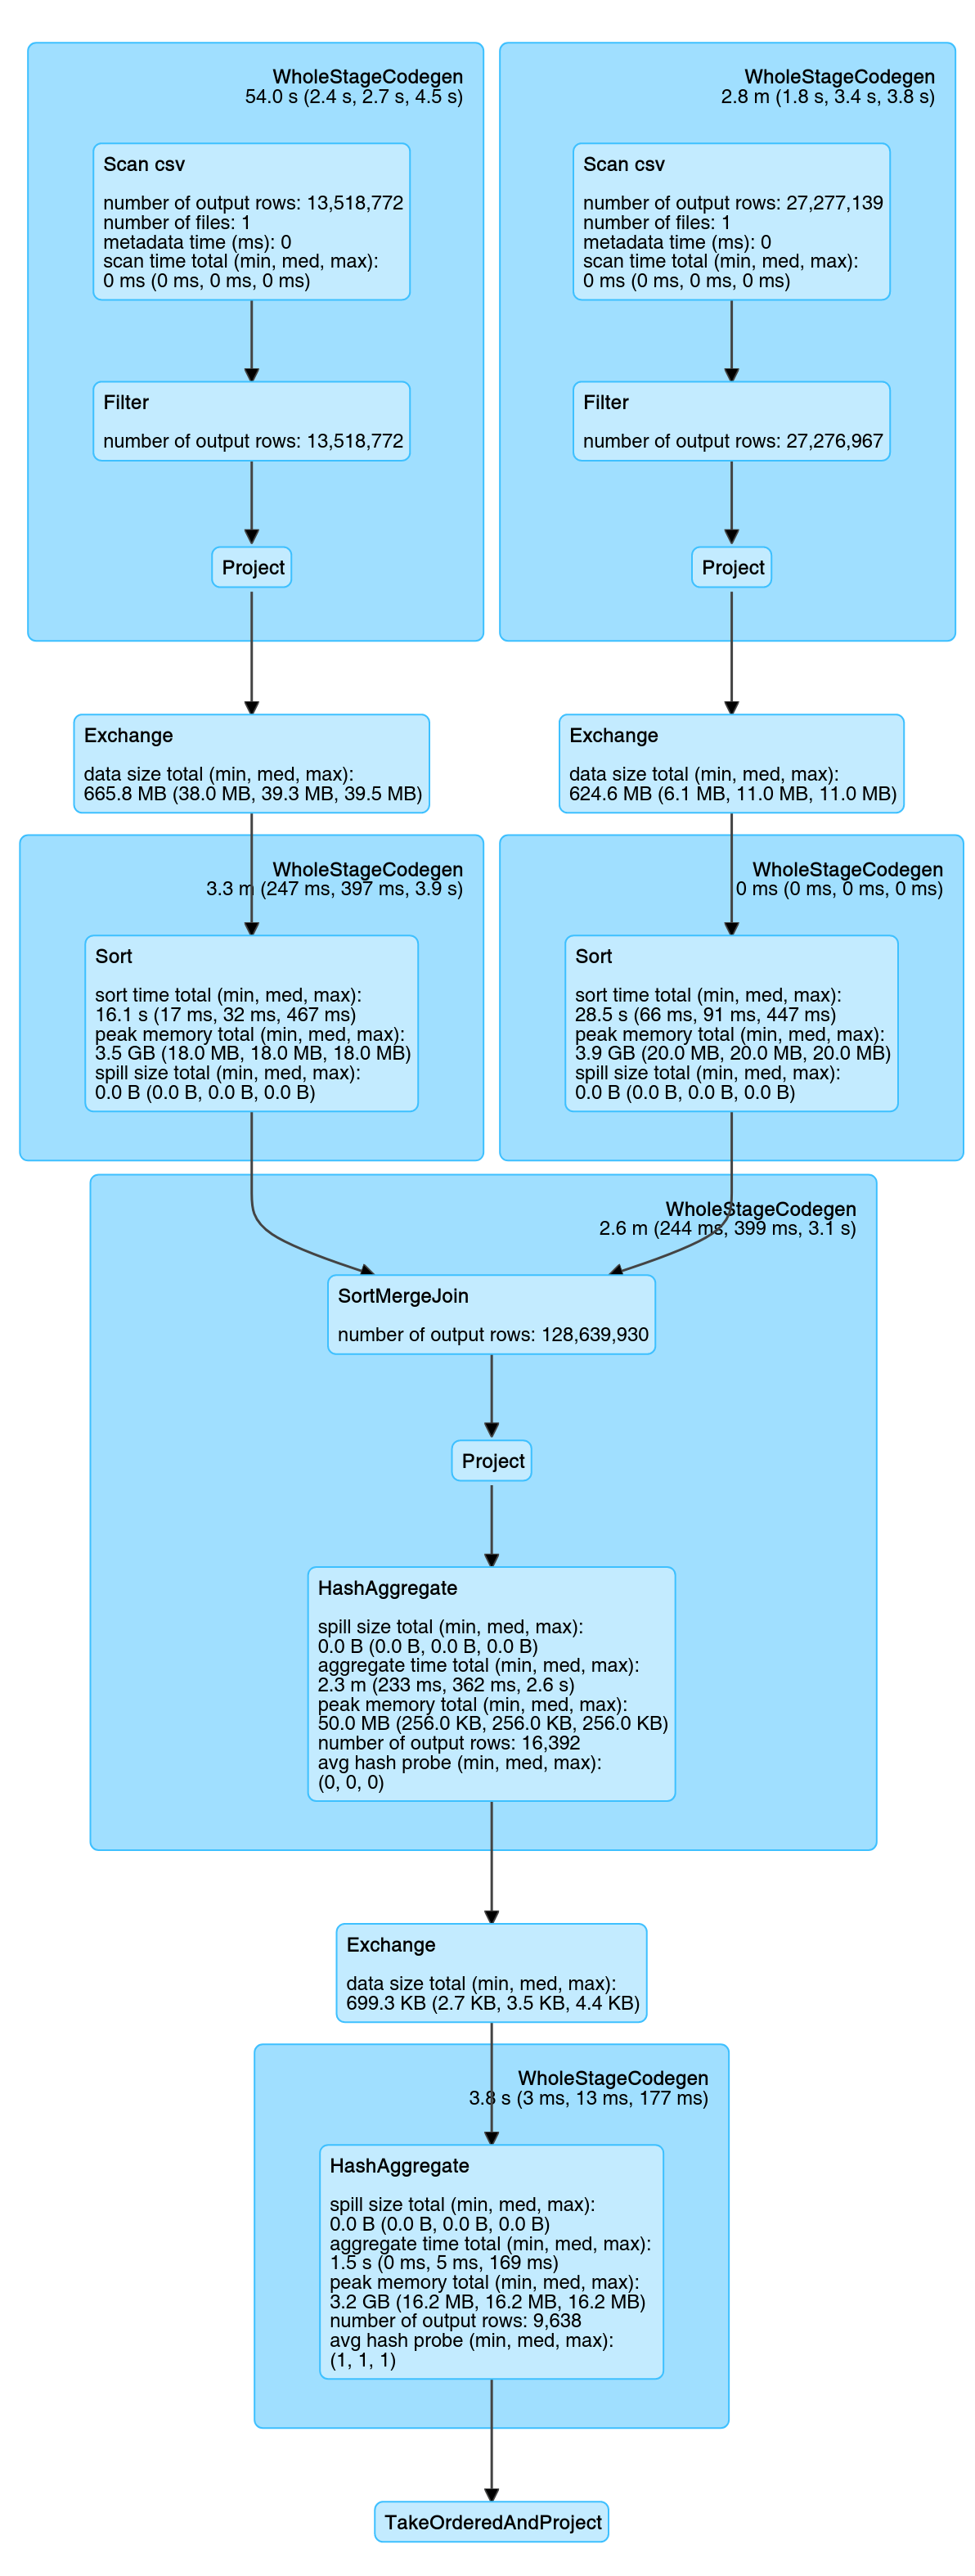

Analyse the dependencies and stages of the queries, and try to determine which commands of the query plan are  executed as wide dependencies and which as narrow dependencies.

---
## **Your solution for Exercise 5 will consist of:**  
*  A short written report for your findings in c) and this notebook, containing your solutions. 
